In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob as gb
import cv2
from tqdm import tqdm

In [99]:
train_dir='/kaggle/input/egyptian-hieroglyphs/train'
test_dir='/kaggle/input/egyptian-hieroglyphs/test'
val_dir='/kaggle/input/egyptian-hieroglyphs/valid'

train_df=pd.read_csv('/kaggle/input/egyptian-hieroglyphs/train/_annotations.csv')
val_df=pd.read_csv('/kaggle/input/egyptian-hieroglyphs/valid/_annotations.csv')
test_df=pd.read_csv('/kaggle/input/egyptian-hieroglyphs/test/_annotations.csv')

In [100]:
train_df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,nile-fish-7-_jpg.rf.31e4278980878c47a1e6a2f8dd...,640,640,Nile_Fish,375,319,512,454
1,Her-8-_jpg.rf.32bcf63f4ae4d6aea53cea5b9c0059b4...,640,640,Her,211,247,368,339
2,composite_bow-34-_jpg.rf.33153e63f7158777c50d4...,640,640,Composite_Bow,158,183,336,282
3,snake-6-_jpg.rf.32ac52ece4bcc06b1ead936693df17...,640,640,Snake,181,351,318,506
4,king-26-_jpg.rf.329a5a8e366f4fe2e3a3dca88524cc...,640,640,King,218,290,339,524


In [101]:
num_classes=train_df['class'].unique()
len(num_classes)

95

In [102]:
new_size = 224    
X_train = []
y_train = []
#labels_df.iterrows()
for index, row in tqdm(train_df.iterrows()):
    image_file = row['filename']
    label = row['class'] 
    image_path = os.path.join(train_dir, image_file)
    orignal_image = cv2.imread(image_path)
    
    if orignal_image is not None:
        xmin = int(row['xmin'])
        ymin = int(row['ymin'])
        xmax = int(row['xmax'])
        ymax = int(row['ymax'])

        cropped_image = orignal_image[ymin:ymax, xmin:xmax]
        
        image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image, (new_size, new_size))
        X_train.append(resized_image)
        y_train.append(label)
    else:
        print(f"Failed to read image: {image_file}")
print("items in X_train is:       ",len(X_train) , " items") 
print("items in y_train is:       ",len(y_train) , " items") 


2723it [00:08, 319.97it/s]

items in X_train is:        2723  items
items in y_train is:        2723  items


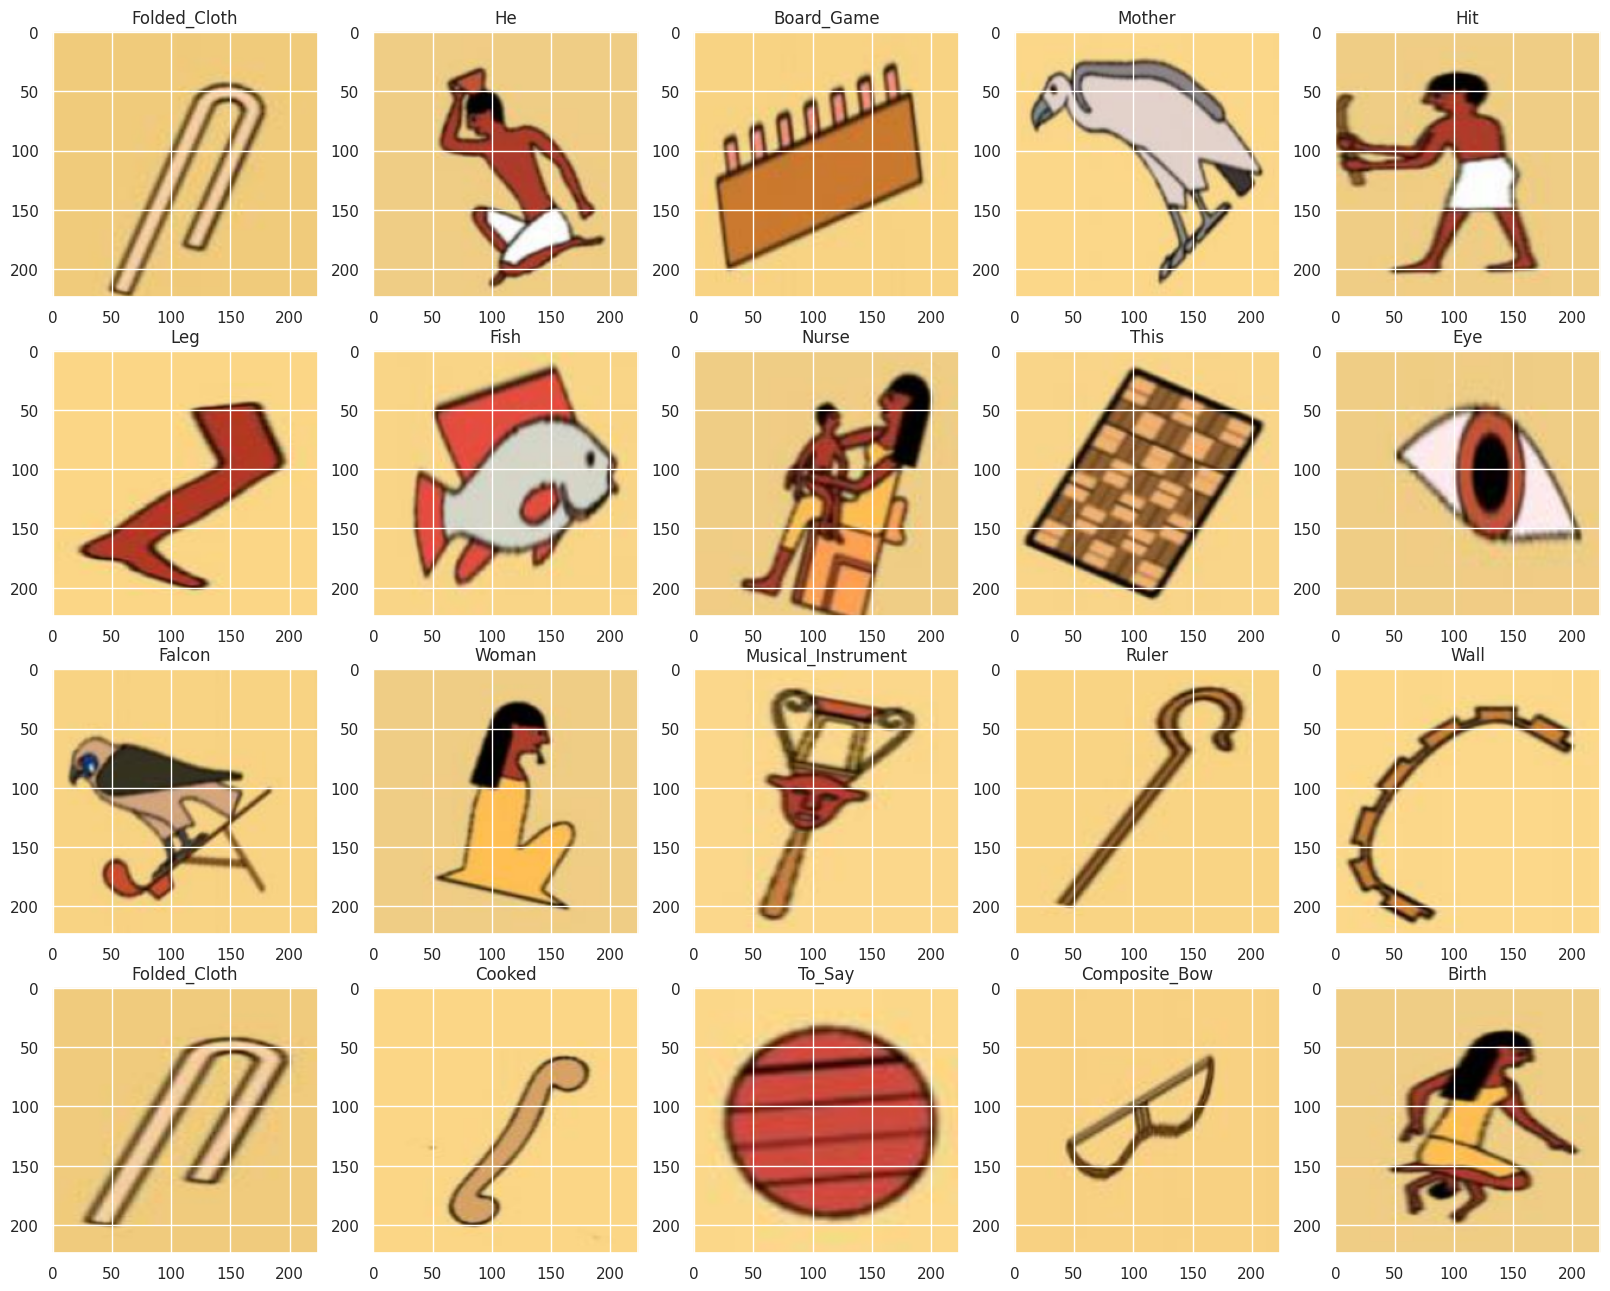

In [103]:
rand_idx=list(np.random.randint(0,len(X_train),20))
plt.figure(figsize=(20,20))
cnt=0
for i in rand_idx:
    plt.subplot(5,5,cnt+1)
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    cnt+=1 

In [104]:
new_size = 224  
X_val=[]
y_val=[]
for index, row in tqdm(val_df.iterrows()):
    image_file = row['filename']
    label = row['class'] 
    image_path = os.path.join(val_dir, image_file)
    orignal_image = cv2.imread(image_path)
    
    if orignal_image is not None:
         xmin = int(row['xmin'])
         ymin = int(row['ymin'])
         xmax = int(row['xmax'])
         ymax = int(row['ymax'])

         cropped_image = orignal_image[ymin:ymax, xmin:xmax]

         image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
         resized_image = cv2.resize(image, (new_size, new_size))
         X_val.append(resized_image)
         y_val.append(label)
    else:
        print(f"Failed to read image: {image_file}")
print("items in X_val is: ",len(X_val) , " items") 
print("items in y_val is: ",len(y_val) , " items")


778it [00:02, 313.96it/s]

items in X_val is:  778  items
items in y_val is:  778  items


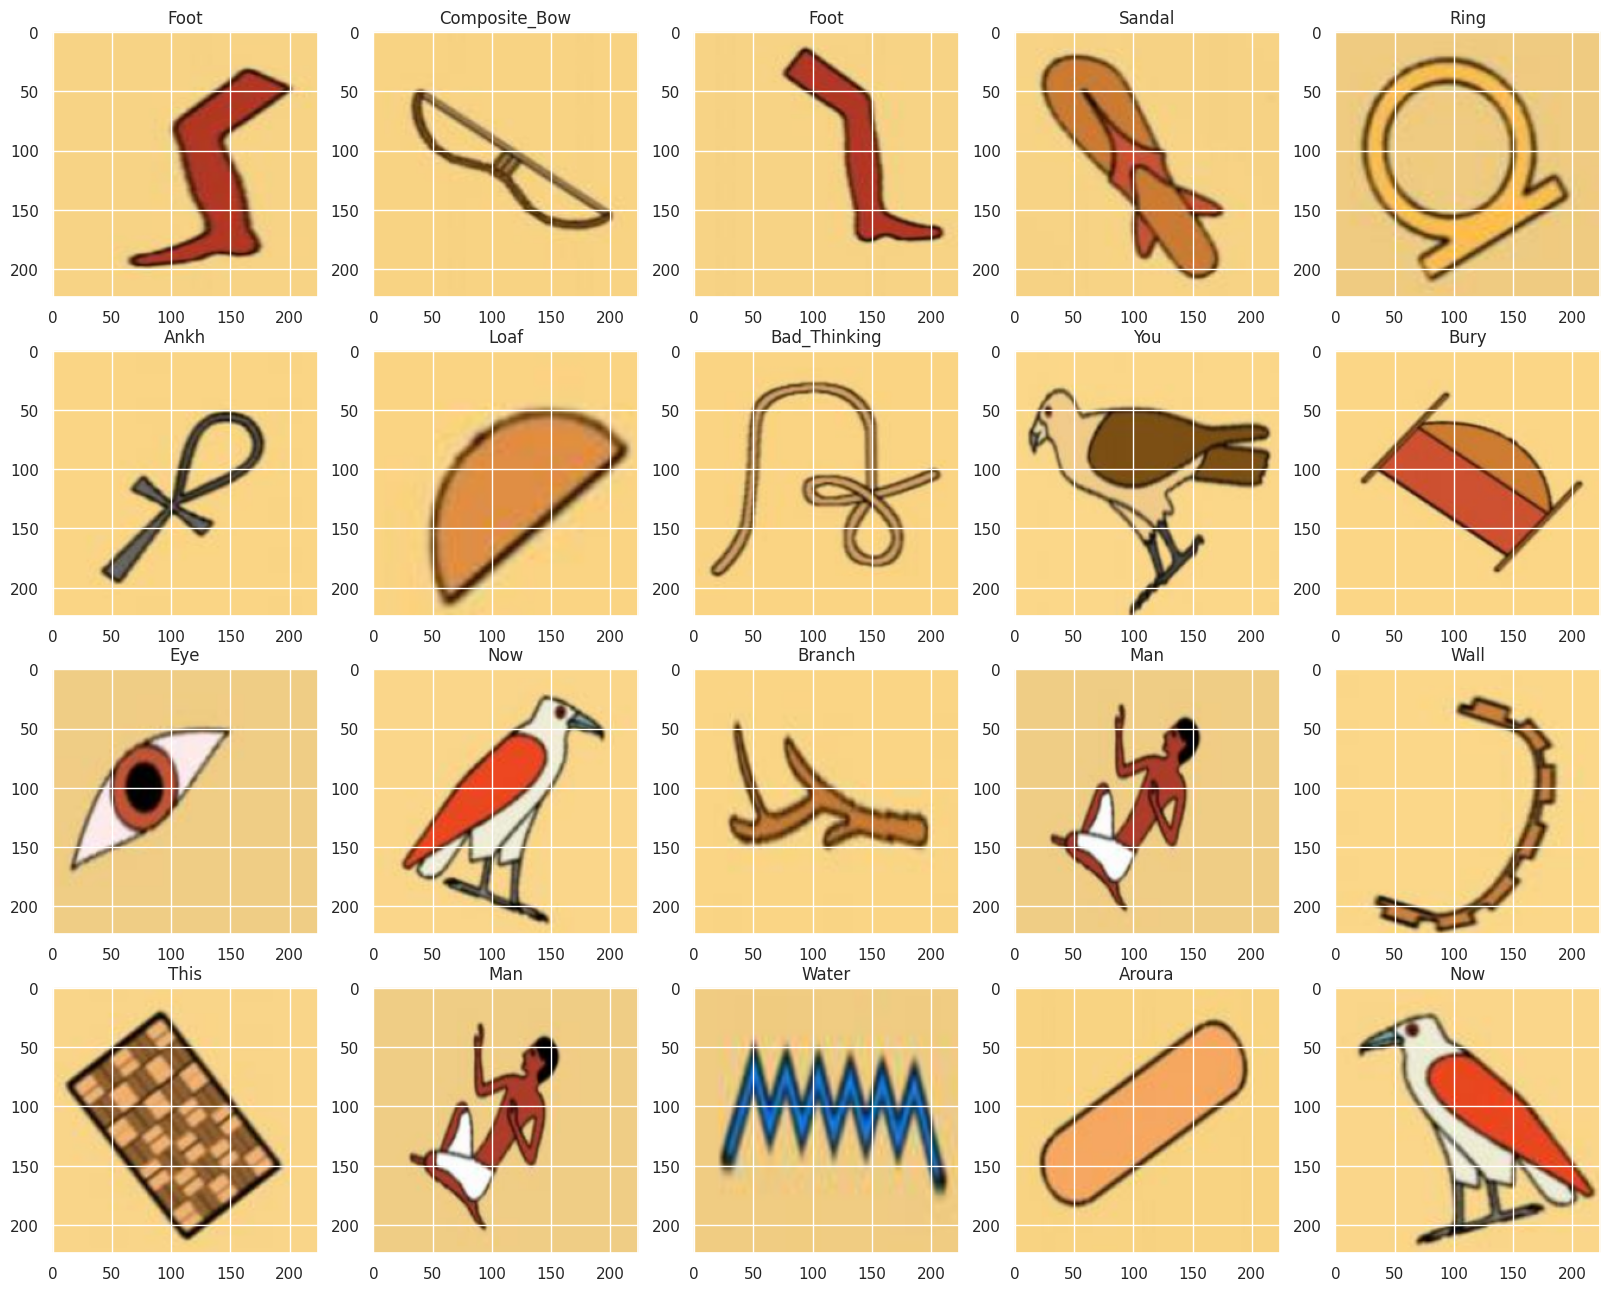

In [105]:
rand_idx=list(np.random.randint(0,len(X_val),20))
plt.figure(figsize=(20,20))
cnt=0
for i in rand_idx:
    plt.subplot(5,5,cnt+1)
    plt.imshow(X_val[i])
    plt.title(y_val[i])
    cnt+=1 

In [106]:
random_train=np.random.randint(0,len(X_train),16)
random_val=np.random.randint(0,len(X_val),16)

In [107]:
#بحط الداتا في اراي عشان اعرف اعمل الضرب عليها في النيورال
X_train = np.array(X_train)
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 3)
y_train = np.array(y_train)
print("X_train shape  :" ,X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape  : (2723, 224, 224, 3)
y_train shape : (2723,)


In [108]:
X_val = np.array(X_val)
X_val= X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 3)
y_val = np.array(y_val)
print("X_val shape  :" ,X_val.shape)
print("y_val shape :", y_val.shape)

X_val shape  : (778, 224, 224, 3)
y_val shape : (778,)


In [109]:
#بقلل the scall of photos 
for i in range(len(X_train)):
    X_train[i]=X_train[i]/255.0

In [110]:
for i in range(len(X_val)):
    X_val[i]=X_val[i]/255.0

In [111]:
#shuffle data بلغبط الداتا 
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)
X_val,y_val = shuffle(X_val,y_val)

In [112]:
#بعمل تشفير للداتا 
from sklearn.preprocessing import LabelEncoder
X_train = np.array(X_train)
y_train = np.array(y_train)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [113]:
from sklearn.preprocessing import LabelEncoder
X_val = np.array(X_val)
y_val = np.array(y_val)
label_encoder = LabelEncoder()
y_val_encoded = label_encoder.fit_transform(y_val)

In [114]:
from tensorflow import keras
import tensorflow as tf

# بعمل صندوق فاضي احط فيه الموديل بتاعي
model = keras.models.Sequential()


model.add(keras.layers.Conv2D(512, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))   

model.add(keras.layers.Conv2D(512, (3, 3), activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D((2, 2)))  

model.add(keras.layers.Flatten(name="Flatten1"))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(95, activation='softmax'))


optimizer = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)                   │ (None, 222, 222, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 222, 222, 512)       │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 111, 111, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 109, 109, 512)       │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 109, 109, 512)       │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 54, 54, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 52, 52, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_44               │ (None, 52, 52, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 26, 26, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 24, 24, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_45               │ (None, 24, 24, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 10, 10, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_46               │ (None, 10, 10, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_47               │ (None, 3, 3, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 11,855,167 (45.22 MB)

 Trainable params: 11,848,703 (45.20 MB)

 Non-trainable params: 6,464 (25.25 KB)

In [115]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3) 

In [116]:
history = model.fit(X_train, y_train_encoded, batch_size=16, epochs=50, validation_data=(X_val,y_val_encoded), shuffle=True,callbacks=[early_stopping, reduce_lr])

Epoch 1/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 63s 313ms/step - accuracy: 0.0230 - loss: 5.1199 - val_accuracy: 0.0026 - val_loss: 4.7591 - learning_rate: 0.0010
Epoch 2/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 47s 274ms/step - accuracy: 0.0223 - loss: 4.7239 - val_accuracy: 0.0026 - val_loss: 5.1267 - learning_rate: 0.0010
Epoch 3/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 47s 274ms/step - accuracy: 0.0343 - loss: 4.4178 - val_accuracy: 0.0116 - val_loss: 4.8765 - learning_rate: 0.0010
Epoch 4/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 47s 274ms/step - accuracy: 0.0498 - loss: 4.2060 - val_accuracy: 0.0424 - val_loss: 4.1112 - learning_rate: 0.0010
Epoch 5/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 47s 274ms/step - accuracy: 0.0554 - loss: 4.0766 - val_accuracy: 0.0900 - val_loss: 3.6733 - learning_rate: 0.0010
Epoch 6/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 47s 275ms/step - accuracy: 0.0541 - loss: 4.0612 - val_accuracy: 0.0977 - val_loss: 3.5630 - learning_rate: 0.0010
Epoch 7/50
171/171 ━━━━━━━━━━━━━━━━━━━━ 47s 275ms/step - accuracy: 0.0

In [117]:
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

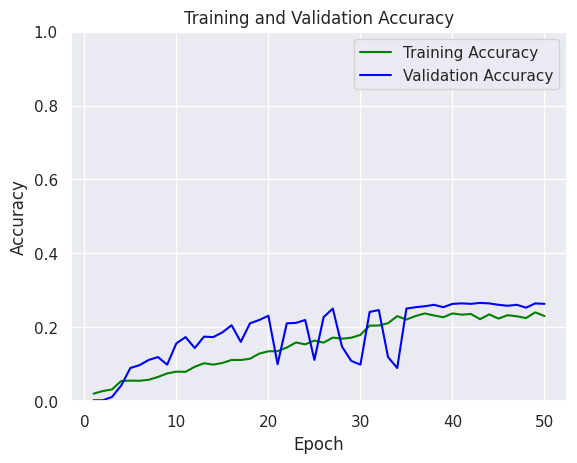

In [118]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0,1)
plt.show()

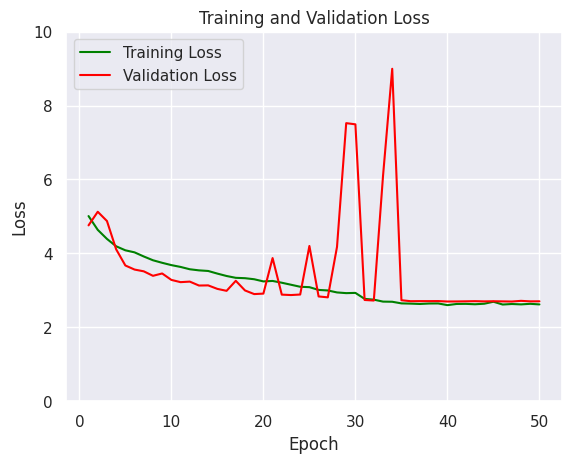

In [119]:
plt.figure()
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,10)
plt.show()

In [120]:
model_evaluate = model.evaluate(X_val, y_val_encoded)
print("Loss     : ",model_evaluate[0])
print("Accuracy : ",model_evaluate[1])

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.2541 - loss: 2.7380
Loss     :  2.6978867053985596
Accuracy :  0.26092544198036194


In [121]:
model_evaluate = model.evaluate(X_train,y_train_encoded)
print("Loss     : ",model_evaluate[0])
print("Accuracy : ",model_evaluate[1])

86/86 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.5818 - loss: 1.8589
Loss     :  1.8714882135391235
Accuracy :  0.5754682421684265
